# Team 6 Project 1 : Analysis of Regionwise Sales Data for Video Games 

Team: Mark Levine, Richa Singh, John Yun, Miguel Gomez

Data Sources and Citations

Data source 
Twitter.com


VADER (Valence Aware Dictionary and sEntiment Reasoner) Sentiment Analysis 
"Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014."

Notebook Contents

1. Time between tweets for the top selling Video games by Hastag names 
2. VADER analysis of Tweets regarding the top selling Video games 


In [4]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
# Target Hashtags
target_tags = ("#Nintendo", "#PS4", "#X360", "#Wii", "#PS3", "#DS")
time_between_tweets = []

# Loop through each hashtag
for tag in target_tags:
    
    # Create array to record all date-times of tweets
    tweet_times = []

    # Get 100 tweets on targetted tag
    public_tweets = api.search(tag, rpp=100)
    print(tag)

    # Loop through all tweets
    for tweet in public_tweets["statuses"]:

        # Store all tweet times into the array
        tweet_times.append(tweet["created_at"])
    
    # Convert all tweet times into datetime objects
    tweet_time_objects = []

    # Add each datetime object into the array
    for x in range(len(tweet_times)):
        tweet_datetime = datetime.strptime(tweet_times[x], "%a %b %d %H:%M:%S %z %Y")
        tweet_time_objects.append(tweet_datetime)

    # Calculate the time between tweets
    time_in_between = []

    # Calculate the time in between each tweet
    for x in range(len(tweet_time_objects)-1):
        secs_apart = ((tweet_time_objects[x] - tweet_time_objects[x+1]).seconds) 
        time_in_between.append(secs_apart)

    # Seconds Between Tweets
    print(f"Avg. Seconds Between Tweets: {np.mean(time_in_between)}")
    print()

#Nintendo
Avg. Seconds Between Tweets: 8.785714285714286

#PS4
Avg. Seconds Between Tweets: 3.5

#X360
Avg. Seconds Between Tweets: 17560.85714285714

#Wii
Avg. Seconds Between Tweets: 436.85714285714283

#PS3
Avg. Seconds Between Tweets: 188.0

#DS
Avg. Seconds Between Tweets: 83.64285714285714



# Time between Tweets Observations 
1. PS4 has the shortest ienterval between tweets of 3.5 seconds followed by Nintendo
2. X360 has the highest gap between tweets followed by Wii

In [8]:
# Target Search Term
target_terms = ("#Nintendo", "#PS4", "#Xbone", "#Wii", "#PS3", "#DS")


# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

# List to hold results
results_list = []

# Loop through all target users
for target in target_terms:

    # Variable for holding the oldest tweet
    oldest_tweet = None

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 5 times
    for x in range(5):

        # Run search around each tweet
        public_tweets = api.search(
            target, count=100, result_type="recent", max_id=oldest_tweet)

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:

            # Use filters to check if user meets conditions
            if (tweet["user"]["followers_count"] < max_followers
                and tweet["user"]["statuses_count"] > min_tweets
                and tweet["user"]["statuses_count"] < max_tweets
                and tweet["user"]["friends_count"] < max_following
                and tweet["user"]["lang"] == lang):

                # Run Vader Analysis on each tweet
                results = analyzer.polarity_scores(tweet["text"])
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]

                # Add each value to the appropriate list
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)
                
            # Set the new oldest_tweet value
            oldest_tweet = tweet["id"] - 1

    # Store the Average Sentiments
    sentiment = {
        "User": target,
        "Compound": np.mean(compound_list),
        "Positive": np.mean(positive_list),
        "Neutral": np.mean(negative_list),
        "Negative": np.mean(neutral_list),
        "Tweet Count": len(compound_list)
    }

    # Print the Sentiments
    print(sentiment)
    print()
    
    # Append  results to 'results_list'
    results_list.append(sentiment)

{'User': '#Nintendo', 'Compound': 0.1722645390070922, 'Positive': 0.0861063829787234, 'Neutral': 0.02446808510638298, 'Negative': 0.8894184397163121, 'Tweet Count': 141}

{'User': '#PS4', 'Compound': 0.2017769662921348, 'Positive': 0.10036516853932585, 'Neutral': 0.022859550561797753, 'Negative': 0.8767696629213483, 'Tweet Count': 178}

{'User': '#Xbone', 'Compound': 0.1398027272727273, 'Positive': 0.09504545454545454, 'Neutral': 0.03402727272727273, 'Negative': 0.8709363636363636, 'Tweet Count': 110}

{'User': '#Wii', 'Compound': 0.20534223602484472, 'Positive': 0.09267701863354039, 'Neutral': 0.02046583850931677, 'Negative': 0.8868571428571428, 'Tweet Count': 161}

{'User': '#PS3', 'Compound': 0.05751517857142857, 'Positive': 0.04209821428571429, 'Neutral': 0.023133928571428573, 'Negative': 0.9347500000000001, 'Tweet Count': 112}

{'User': '#DS', 'Compound': 0.13292597402597403, 'Positive': 0.03712121212121212, 'Neutral': 0.0008138528138528138, 'Negative': 0.9620649350649352, 'Tweet 

In [9]:
VG_df = pd.DataFrame(results_list).round(3)
VG_df

,Compound,Negative,Neutral,Positive,Tweet Count,User
0,0.172,0.889,0.024,0.086,141,#Nintendo
1,0.202,0.877,0.023,0.100,178,#PS4
2,0.140,0.871,0.034,0.095,110,#Xbone
3,0.205,0.887,0.020,0.093,161,#Wii
4,0.058,0.935,0.023,0.042,112,#PS3
5,0.133,0.962,0.001,0.037,231,#DS


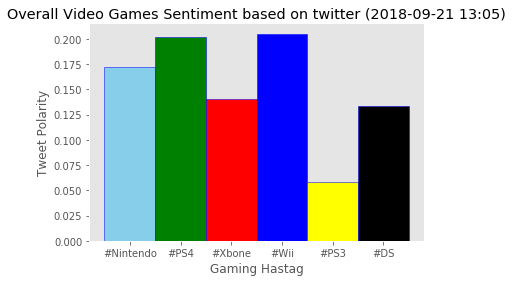

<Figure size 432x288 with 0 Axes>

In [10]:
#Overall Gaming Sentiment Bar Chart
colors = ['skyblue','green','red', 'blue', 'yellow', 'black']
time_chart = plt.bar(VG_df["User"],VG_df["Compound"] , color=colors, align ='center',width=1.0, edgecolor ='b')

#Other properties of the chart
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Overall Video Games Sentiment based on twitter ({now})") 
plt.ylabel("Tweet Polarity")
plt.xlabel("Gaming Hastag")
plt.grid(False)
plt.show()

plt.savefig("output_data/sentiments_bar.png")
 

# VADER Analysis on tweets releated to top selling Video Games
1. The average compound figure is positive for all the video games 
2. PS3 has the lowest compoind with Wii and PS4 higher compound scores